In [1]:
# Step 1: Import Libraries
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# Step 2: Setup and Download Dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:10<00:00, 82.8MB/s]
100% 1.06G/1.06G [00:10<00:00, 106MB/s] 


In [3]:
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [4]:
# Step 3: Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [5]:
train_ds = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 16000 images belonging to 2 classes.


In [6]:
val_ds = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 4000 images belonging to 2 classes.


In [7]:
# Step 4: Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='valid', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='valid'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='valid'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
# Step 5: Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Step 6: Setup Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

In [11]:
# Step 7: Train Model
history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[early_stop])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 308s 594ms/step - accuracy: 0.5520 - loss: 2.8196 - val_accuracy: 0.6135 - val_loss: 0.6537
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 294s 589ms/step - accuracy: 0.6482 - loss: 0.6306 - val_accuracy: 0.6030 - val_loss: 0.8587
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 320s 641ms/step - accuracy: 0.6648 - loss: 0.6318 - val_accuracy: 0.7290 - val_loss: 0.5345
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 294s 587ms/step - accuracy: 0.7175 - loss: 0.5518 - val_accuracy: 0.7477 - val_loss: 0.5206
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 293s 586ms/step - accuracy: 0.7508 - loss: 0.5068 - val_accuracy: 0.5725 - val_loss: 0.6393
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 292s 585ms/step - accuracy: 0.7569 - loss: 0.4999 - val_accuracy: 0.7715 - val_loss: 0.5010
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 306s 612ms/step - accuracy: 0.7892 - loss: 0.4483 - val_accuracy: 0.7542 - val_loss: 0.5128
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 303s 606ms/step - accuracy: 0.8011 -

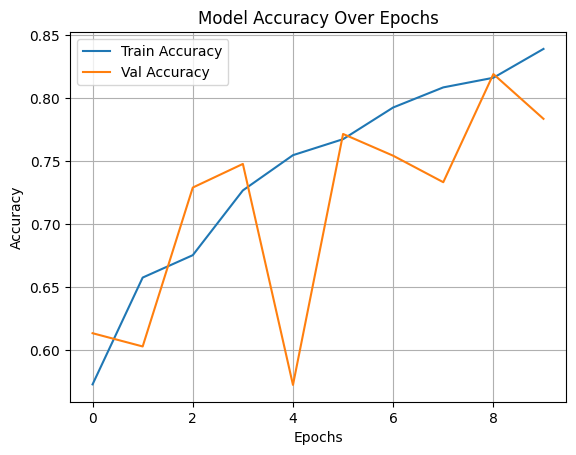

In [12]:
# Step 8: Evaluate & Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

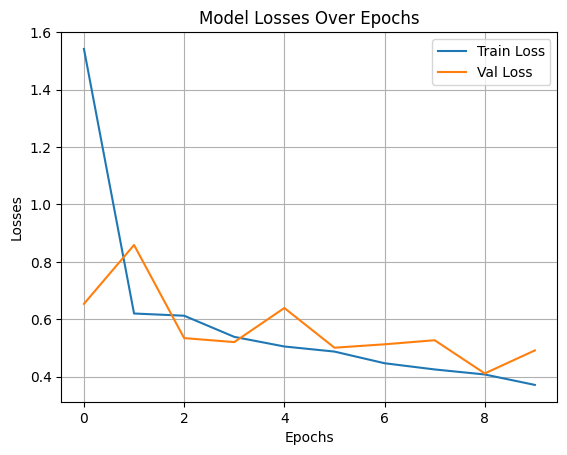

In [13]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Losses Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.grid(True)
plt.show()

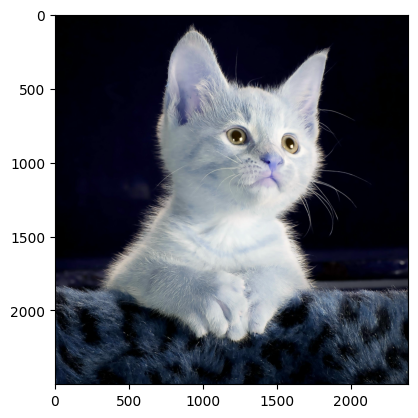

In [14]:
import cv2
test_img = cv2.imread('/content/kitty-cat-kitten-pet-45201.jpeg')
plt.imshow(test_img)

In [15]:
test_img.shape

(2500, 2392, 3)

In [16]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.]], dtype=float32)

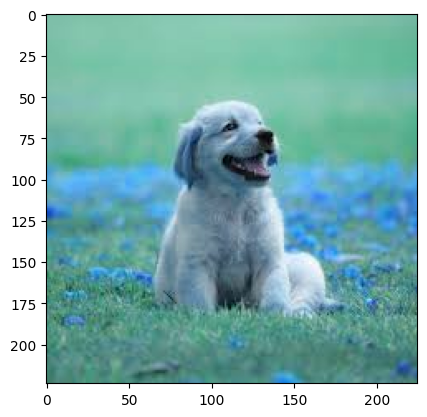

In [18]:
test_img1 = cv2.imread('/content/download.jpeg')
plt.imshow(test_img1)

In [19]:
test_img1.shape

(224, 225, 3)

In [20]:
test_img1 = cv2.resize(test_img1,(256,256))
test_input1 = test_img1.reshape((1,256,256,3))
model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.4504235]], dtype=float32)

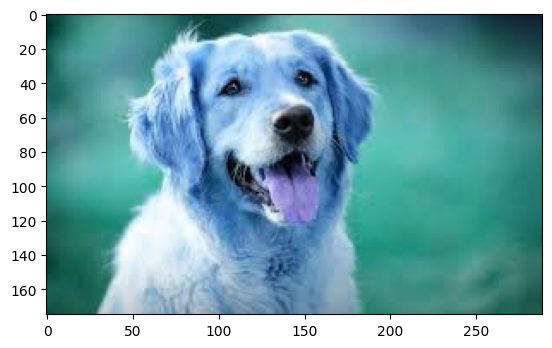

In [21]:
test_img2 = cv2.imread('/content/images.jpeg')
plt.imshow(test_img2)

In [22]:
test_img2.shape

(175, 289, 3)

In [23]:
test_img2 = cv2.resize(test_img2,(256,256))
test_input2 = test_img2.reshape((1,256,256,3))
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0.4504235]], dtype=float32)

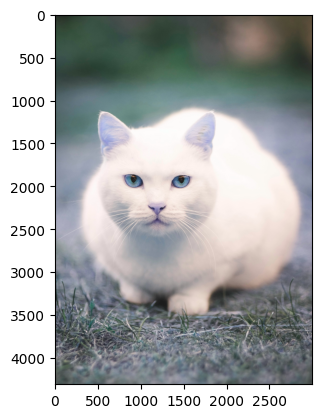

In [24]:
test_img3 = cv2.imread('/content/photo-1531040630173-7cfb894c8eaa.jpeg')
plt.imshow(test_img3)

In [25]:
test_img3.shape

(4307, 3000, 3)

In [26]:
test_img3 = cv2.resize(test_img3,(256,256))
test_input3 = test_img3.reshape((1,256,256,3))
model.predict(test_input3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.]], dtype=float32)